In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from numpy.random import shuffle
%config InlineBackend.figure_format = 'retina'

In [2]:
with open('pca_mat_1000', 'rb') as file:
    pca_mat = pickle.load(file)
with open('targets_1000', 'rb') as file:
    targets = pickle.load(file)
    
X = np.array(pca_mat)
Y = np.array(targets)

mask = ((Y==0) | (Y==2))
X = X[mask]
Y = Y[mask]
Y[Y==2] = 1

X.shape, Y.shape

# np.mean(X, axis=0, dtype=np.float32)[-1]

((538325, 1001), (538325,))

In [38]:
(X > 0).mean(axis=0)

In [5]:
X_test = X[:100000]
Y_test = Y[:100000]

### pca_mat for binary classification creation

#### unequal labels

In [21]:
# mask = ((Y==2) | (Y==0))

# Y = np.reshape(Y,newshape=(len(Y),1))
# xy = np.concatenate((X, Y), axis=1)
# xy = xy[mask]
# xy.shape

# shuffle(xy)
# xy = xy[:30000]
# xy.dump('pca_short')

#### equal labels

In [3]:
mask_cln = (Y==0)
mask_malw = (Y==2)

Y_c, Y_m = Y[mask_cln], Y[mask_malw]
X_c, X_m = X[mask_cln], X[mask_malw]
lim = min(len(Y_c), len(Y_m))
Y_c, Y_m = Y_c[:lim], Y_m[:lim]
X_c, X_m = X_c[:lim], X_m[:lim]

X = np.concatenate((X_c,X_m))
Y = np.concatenate((Y_c,Y_m))

Y = np.reshape(Y,newshape=(len(Y),1))
xy = np.concatenate((X, Y), axis=1)

shuffle(xy)
xy = xy[:30000]
xy.dump('pca_short')

(390486, 102)

## t-SNE

In [7]:
from sklearn.manifold import TSNE

X = X_test
Y = Y_test

n_comp = 2
X_embedded = TSNE(n_components=n_comp).fit_transform(X)

x_tsne = X_embedded.copy()
x_tsne = x_tsne * 1e+3

color = lambda x: 'blue' if x == 2 else ('red' if x == 0 else 'green')
colors = np.array([color(item) for item in Y])
plt.figure(figsize=(30,20))

for i in range(2):
    plt.subplot(1,2,i + 1)
    mask = (Y==i*2)
    plt.scatter(x_pca[mask,0],x_pca[mask,1],c=colors[mask], alpha=0.1)
    plt.xlim(-500, 2000)
    plt.ylim(-500, 2000)
    
X_embedded = TSNE(n_components=3).fit_transform(X)

x_tsne = X_embedded.copy()
x_tsne = x_tsne * 1e+4

color = lambda x: 'blue' if x == 2 else 'red'
colors = [color(item) for item in Y]

fig = plt.figure(figsize=(30,20))
ax = Axes3D(fig)
ax.scatter(x_tsne[:,0],x_tsne[:,1],x_tsne[:,2],c=colors)
plt.show()

## PCA

In [3]:
from sklearn.decomposition import PCA

In [4]:
pca = PCA(n_components=20)
pca.fit(X)
x_pca = pca.transform(X)

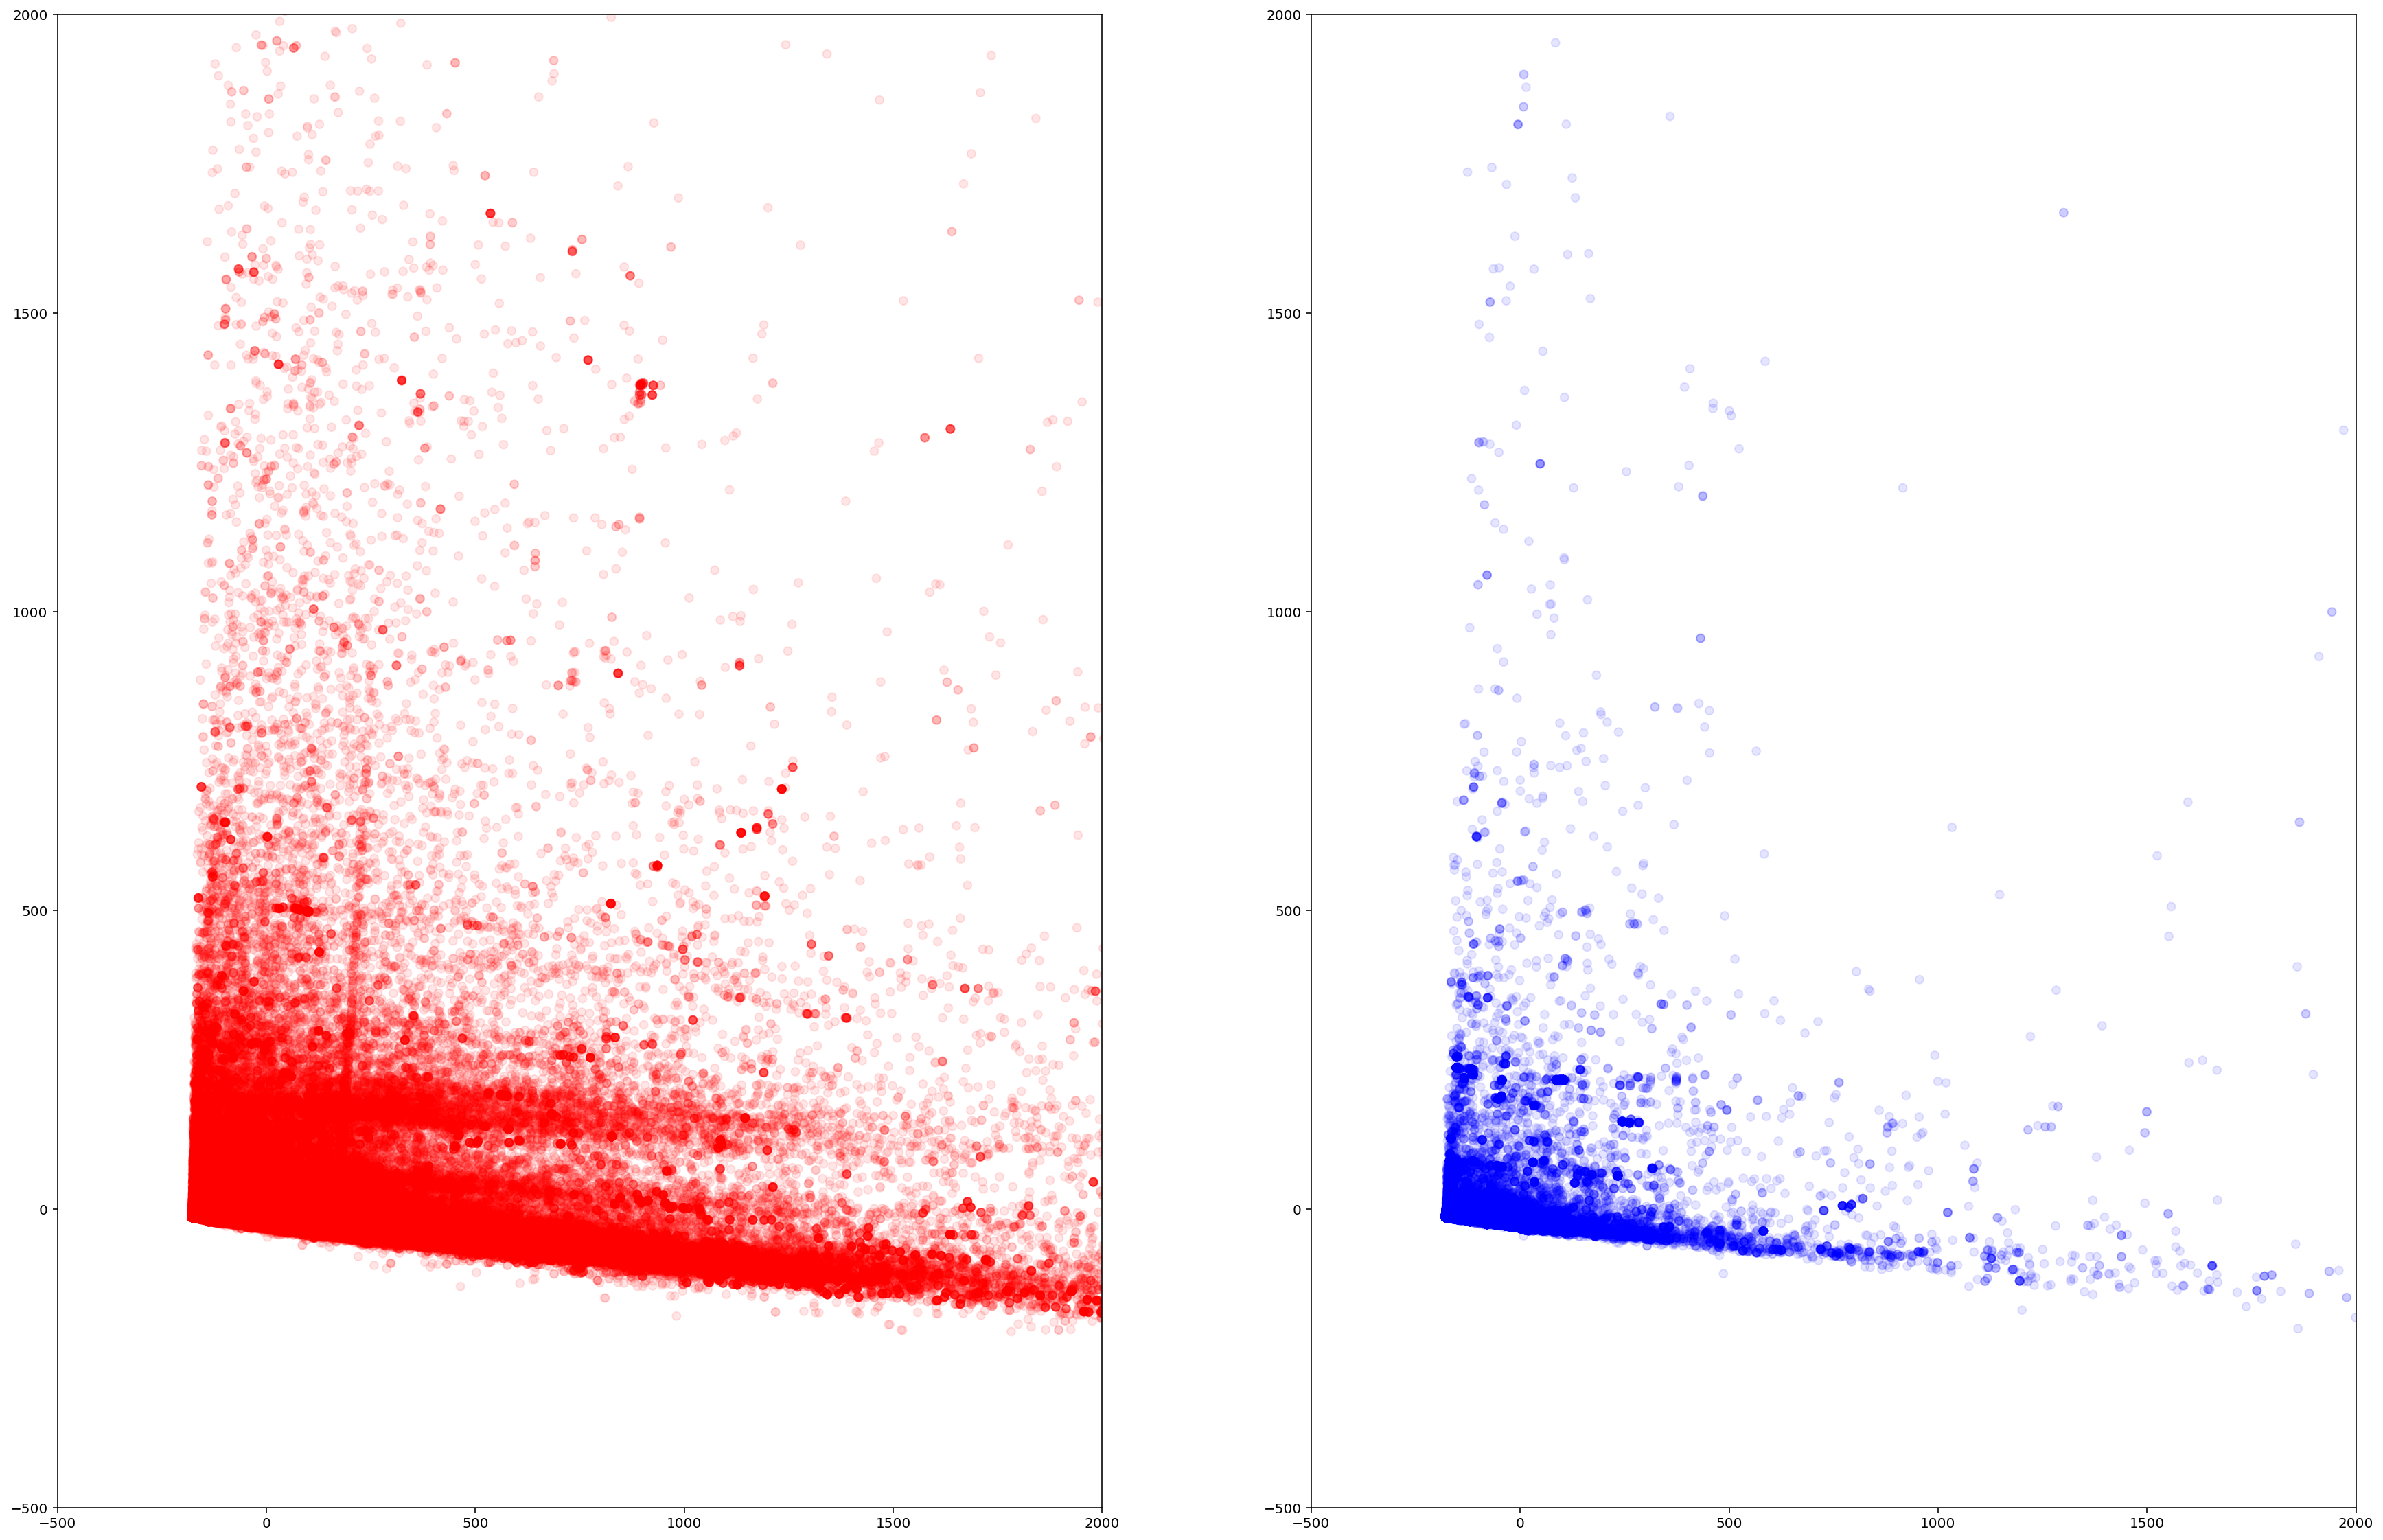

In [40]:
color = lambda x: 'blue' if x == 2 else ('red' if x == 0 else 'green')
colors = np.array([color(item) for item in Y])
plt.figure(figsize=(30,20))

for i in range(2):
    plt.subplot(1,2,i + 1)
    mask = (Y==i*2)
    plt.scatter(x_pca[mask,0],x_pca[mask,1],c=colors[mask], alpha=0.1)
    plt.xlim(-500, 2000)
    plt.ylim(-500, 2000)

(array([344274.,      0.,      0.,      0.,      0., 304191.,      0.,
             0.,      0., 201476.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

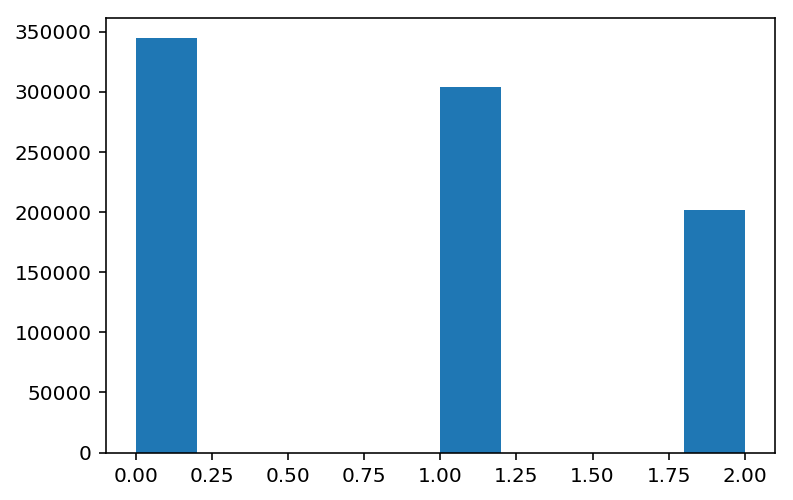

In [41]:
plt.hist(Y)

In [33]:
pca = PCA(n_components=3)
pca.fit(X)
x_pca = pca.transform(X)

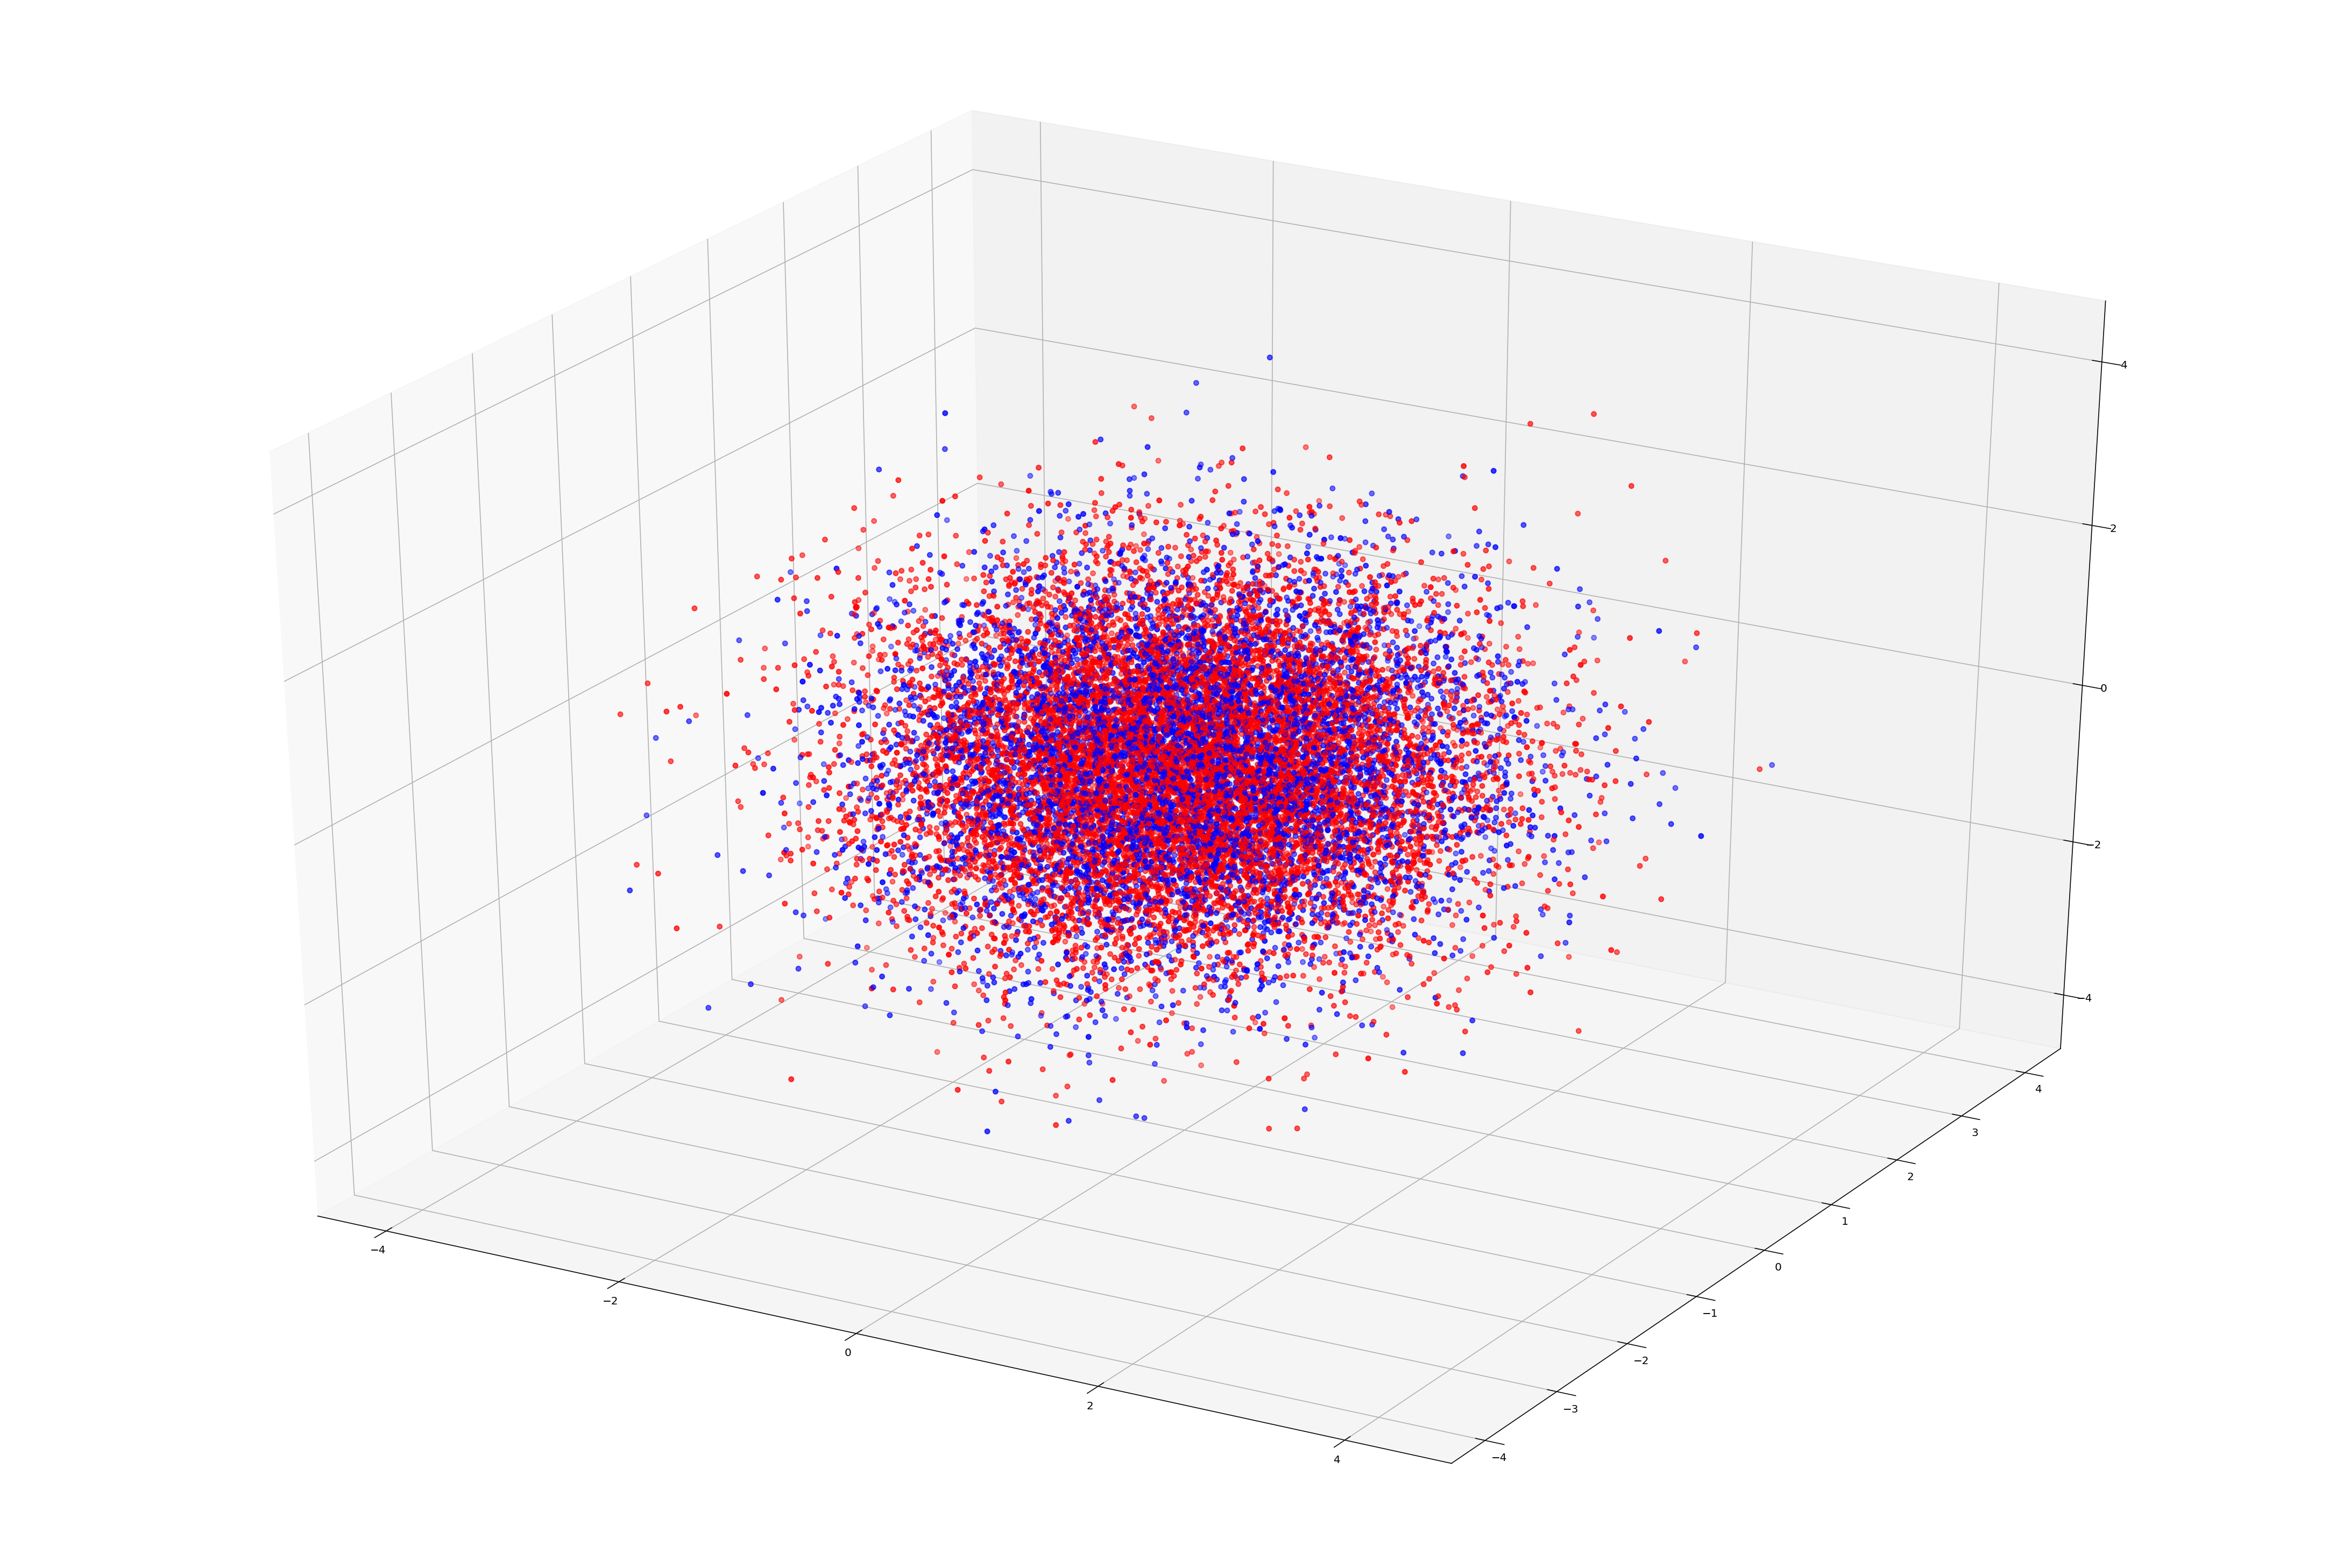

In [34]:
color = lambda x: 'blue' if x == 2 else 'red'
colors = [color(item) for item in Y]

fig = plt.figure(figsize=(30,20))
ax = Axes3D(fig)
ax.scatter(x_pca[:,0],x_pca[:,1],x_pca[:,2],c=colors)
plt.show()

## Histograms

In [5]:
import seaborn
import numpy as np

In [5]:
mask_0 = (Y==0) 
mask_2 = (Y==2)
mask_all = (Y!=1)

In [8]:
with open('dict2.txt', 'rb') as handle:
    d = pickle.load(handle)
    
labels = sorted(d.items(), key=lambda x: x[1])
sorted_labels = [x[0] for x in labels]

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe5 in position 3: ordinal not in range(128)

In [70]:
path_to_dict = 'dict.txt'
with open(path_to_dict, 'rb') as file:
    dict_800k = pickle.load(file)

UnicodeDecodeError: 'ascii' codec can't decode byte 0xe5 in position 3: ordinal not in range(128)

C:\Users\pogorelov_g\Desktop\work\venv_py36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


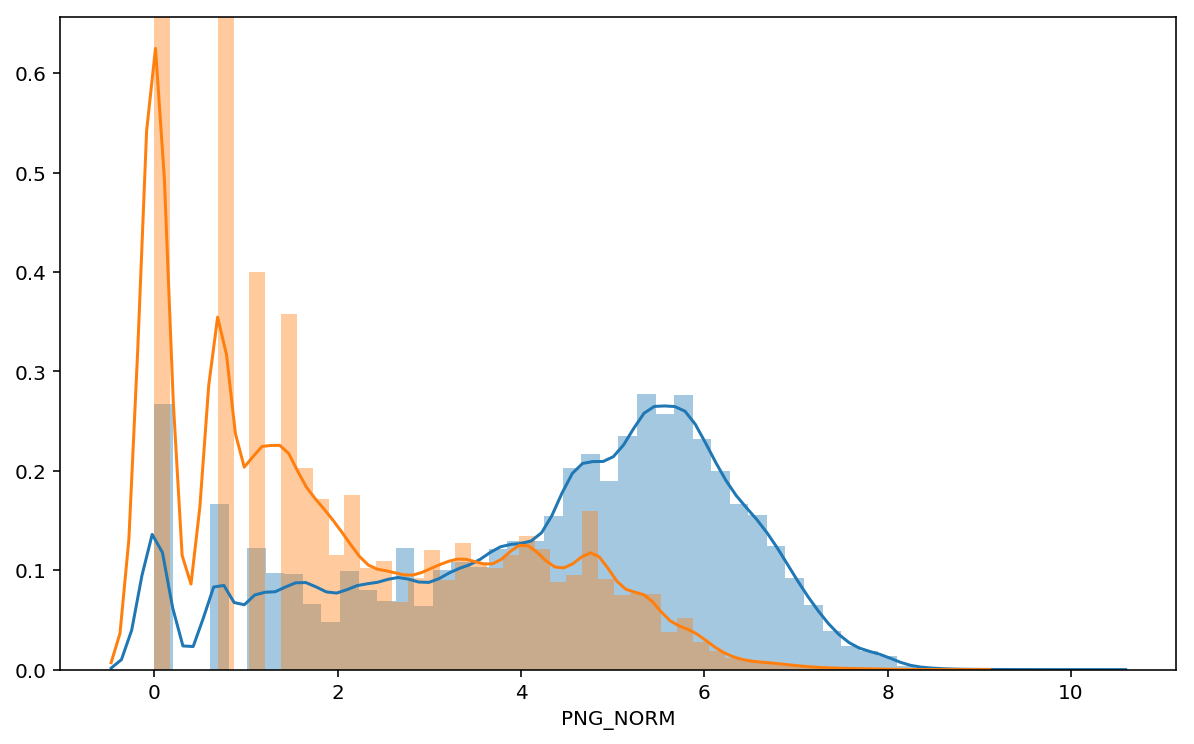

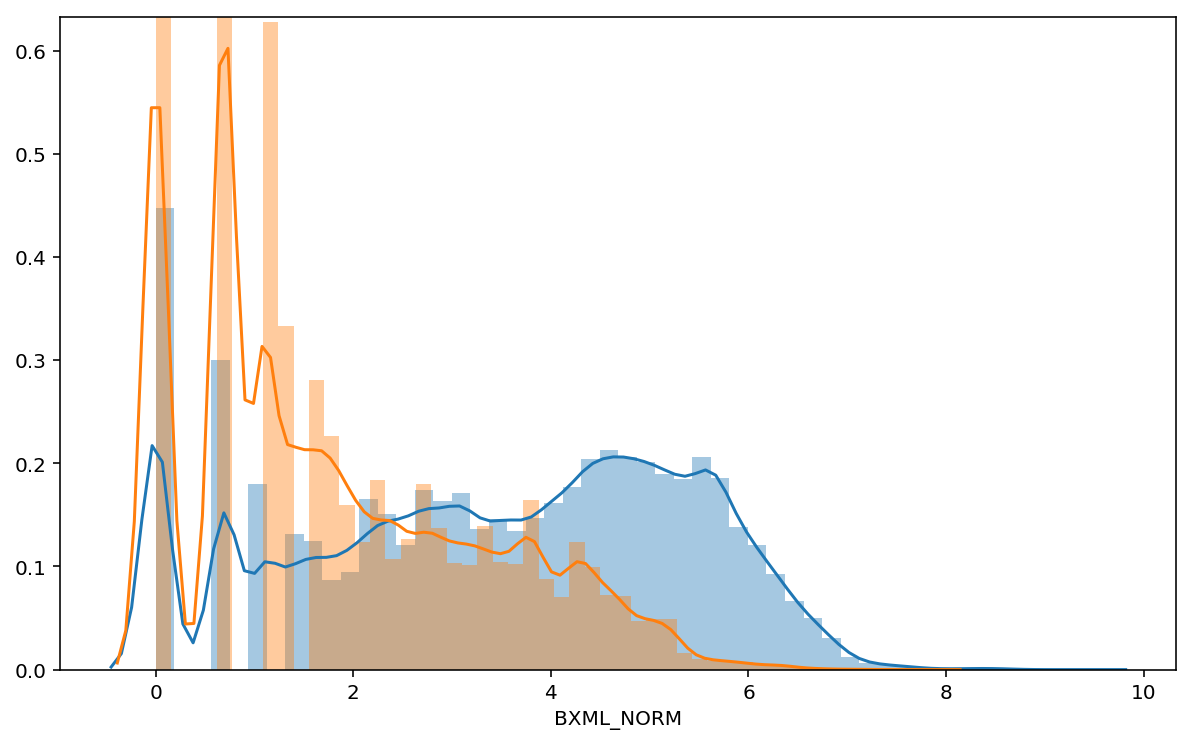

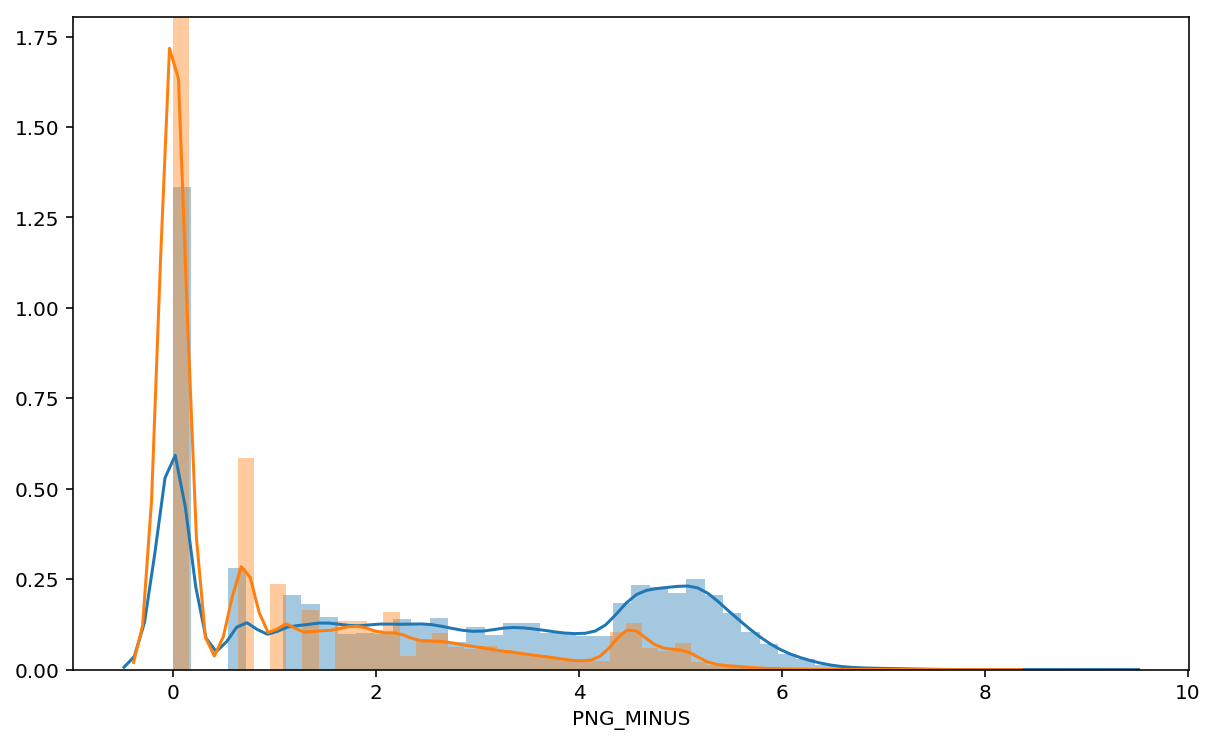

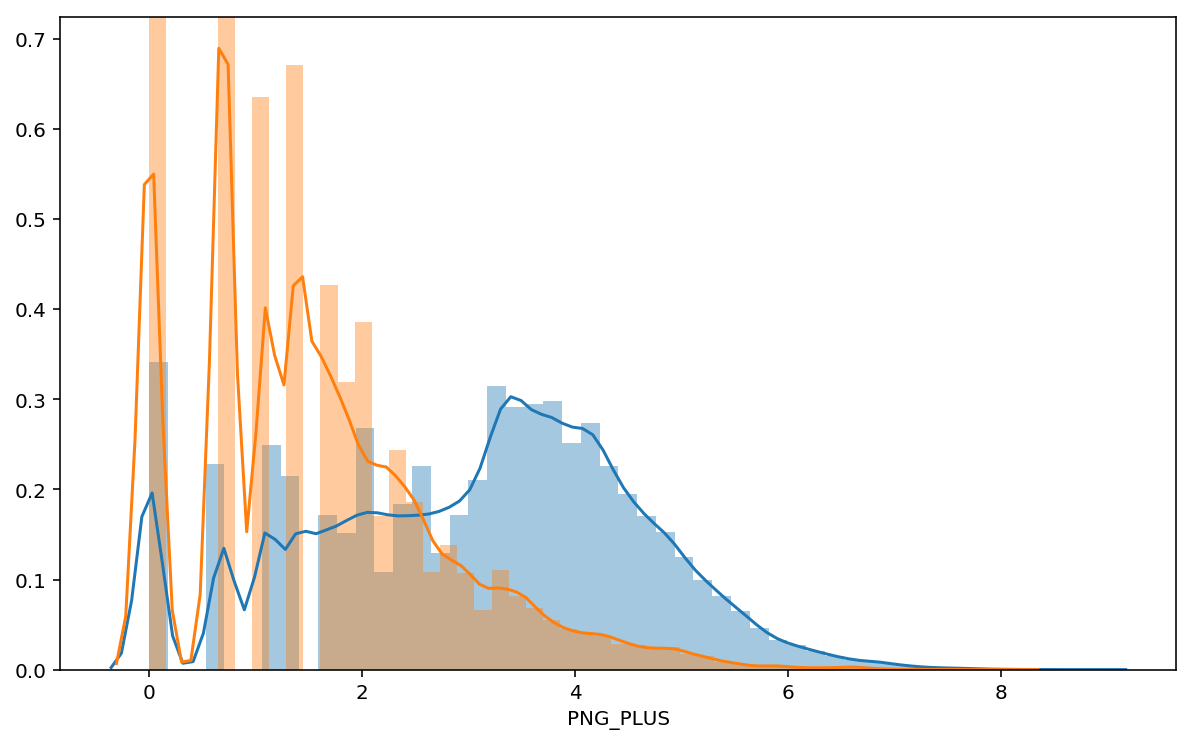

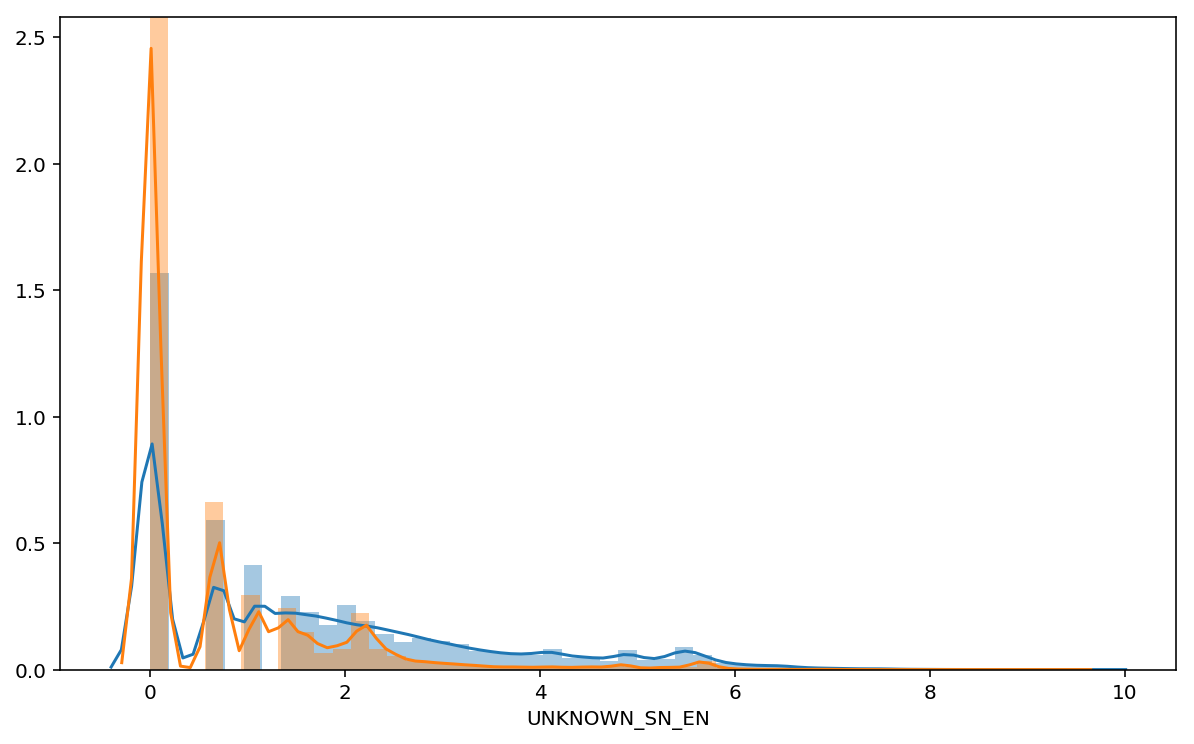

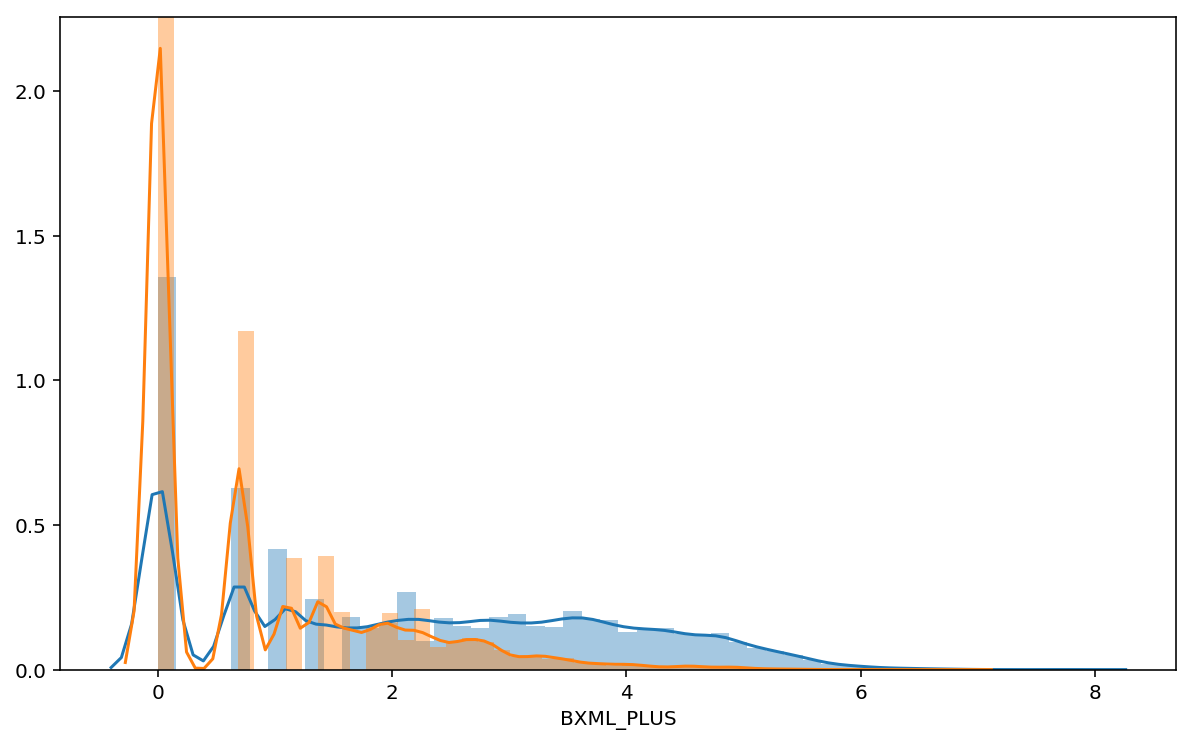

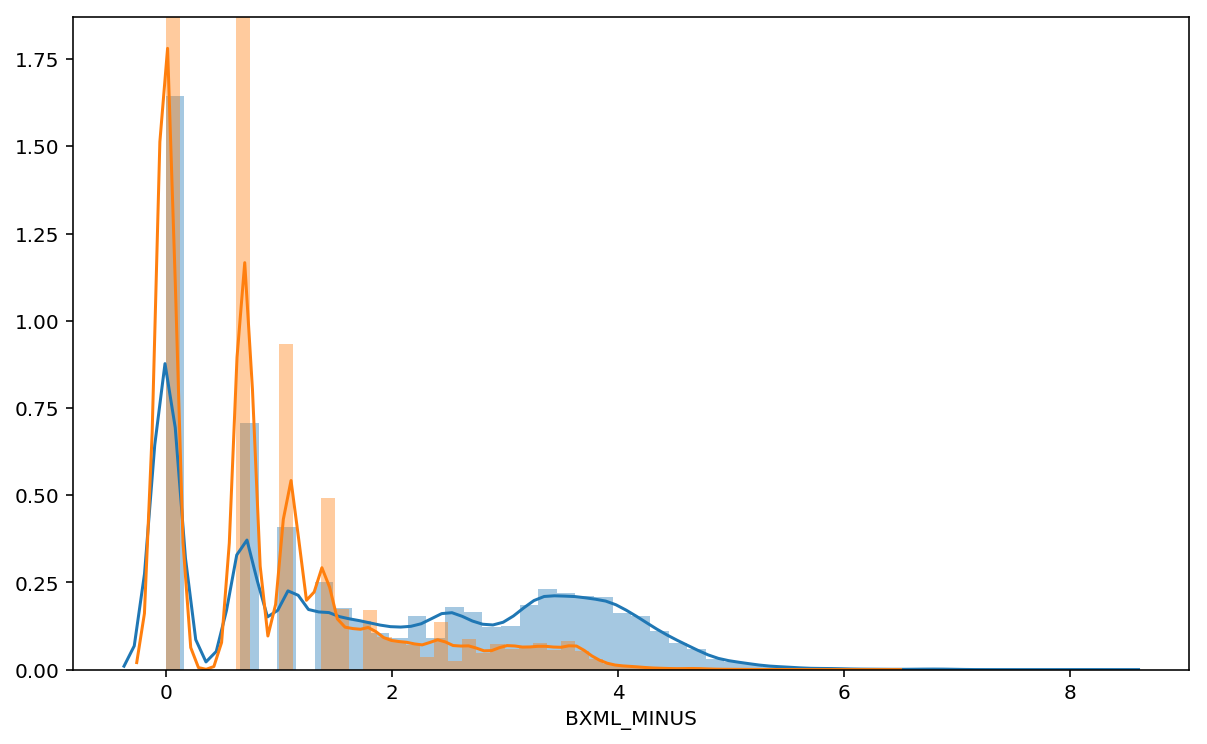

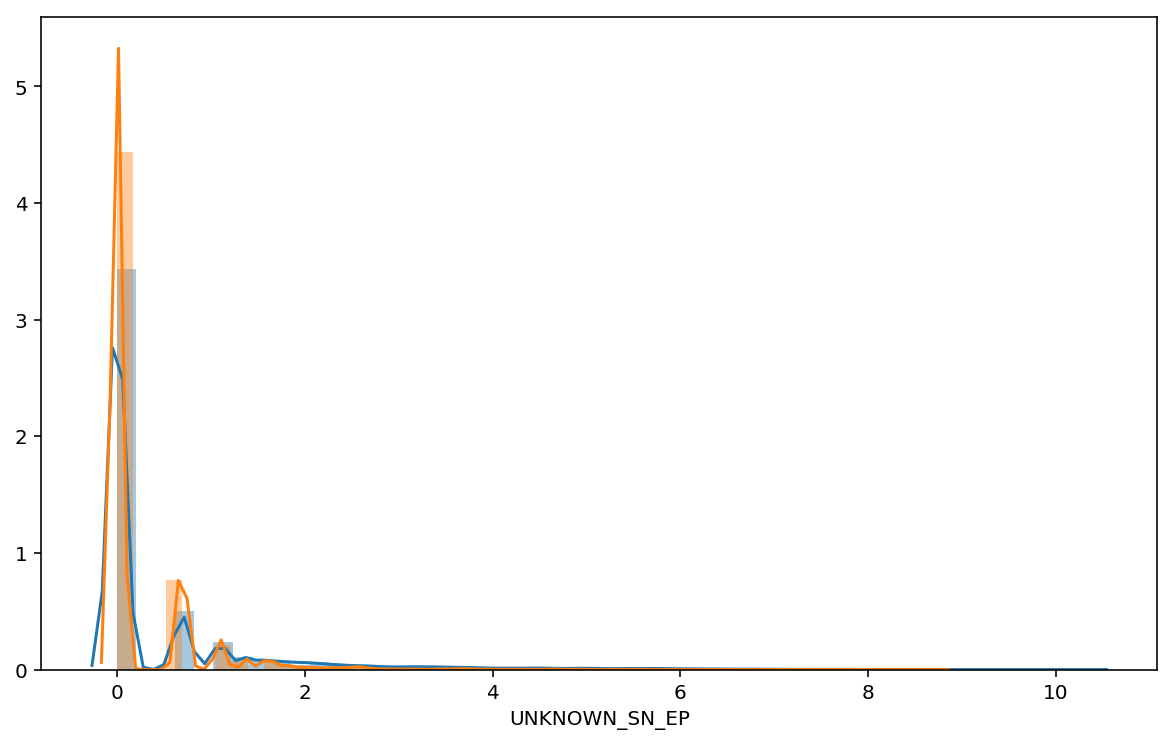

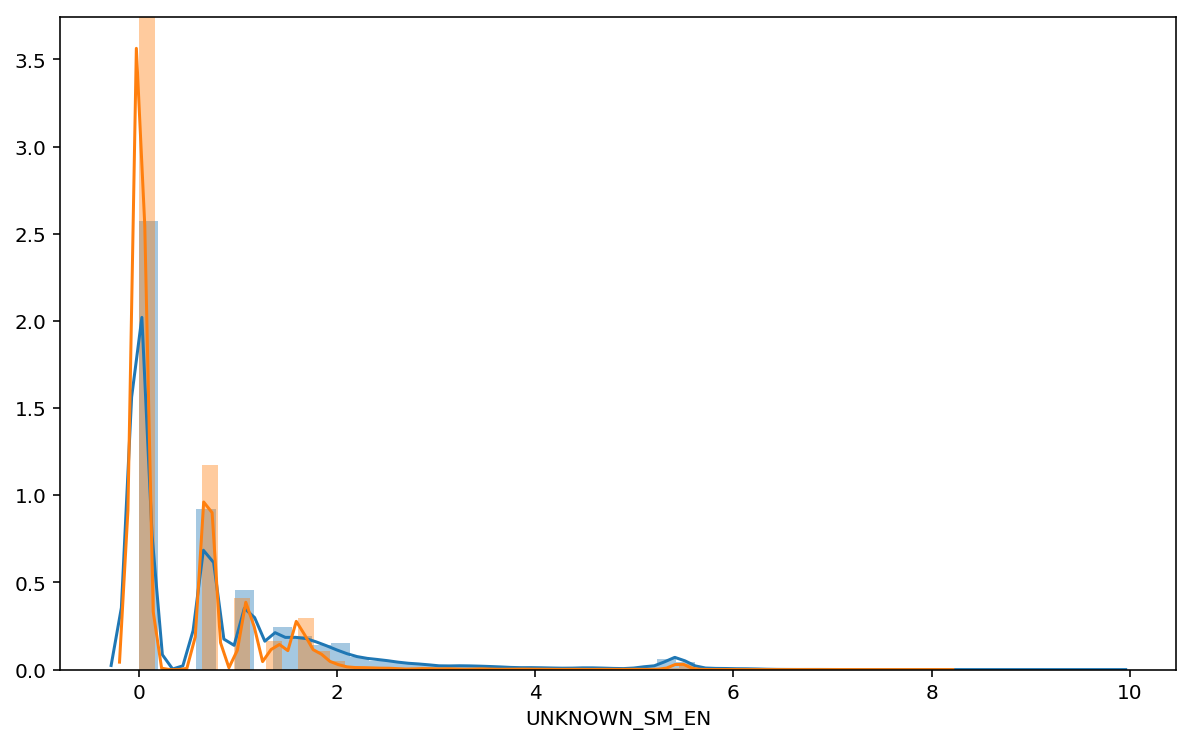

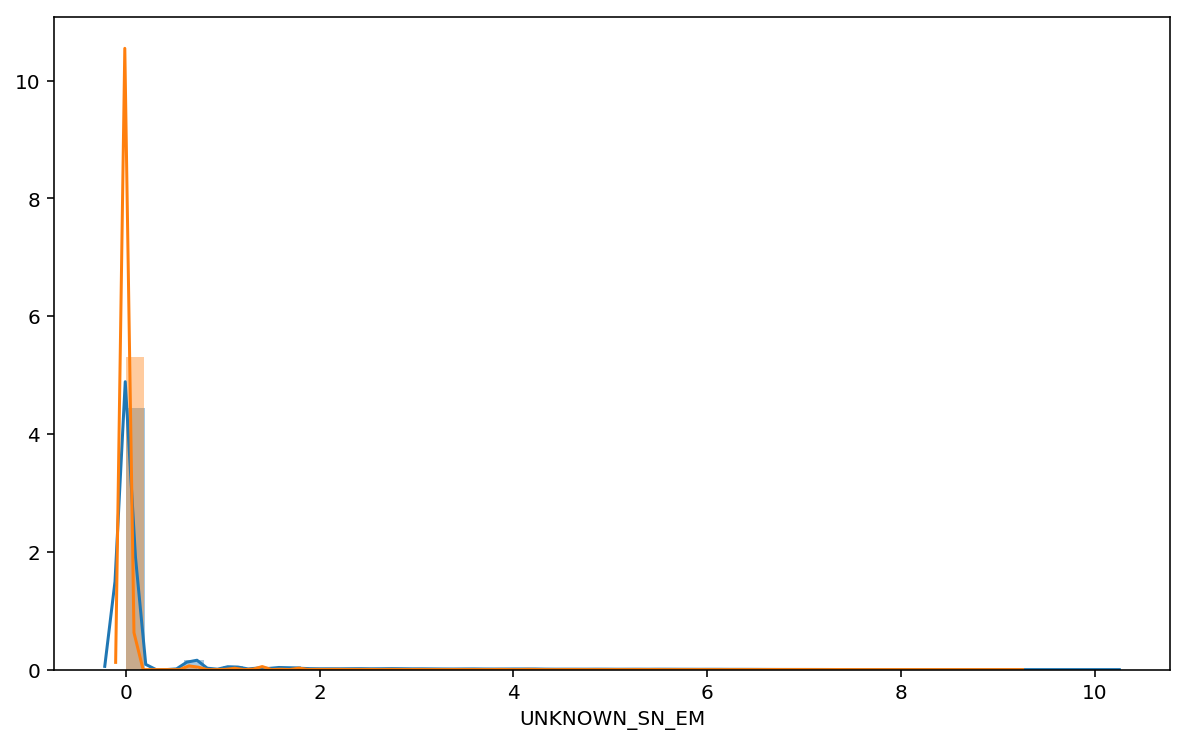

In [28]:
x = X_0
n_bins = 30
for i in range(10):
    plt.figure(figsize=(10,6))
    seaborn.distplot(np.log1p(X_0[:,-(i+1)]),norm_hist=True,axlabel=sorted_labels[-(i+1)])
    seaborn.distplot(np.log1p(X_2[:,-(i+1)]),norm_hist=True)
    plt.show()

## Autoencoder

In [9]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers, optimizers
from sklearn.metrics import mean_squared_error
from math import sqrt

C:\Users\pogorelov_g\Desktop\work\venv_py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [10]:
import numpy as np

def sigmoid(x, derivative=False):
    return x*(1-x) if derivative else 1/(1+np.exp(-x))

In [11]:
input_dim = len(X[0])
encoding_1 = 50
encoding_2 = 20

input_ = Input(shape=(input_dim,))

encoded = Dense(encoding_1,
                activity_regularizer=regularizers.l1(1e-5))(input_)
encoded = Dense(encoding_2,
                activity_regularizer=regularizers.l1(1e-5))(encoded)

# decoded = Dense(input_dim, activation='sigmoid')(encoded)
decoded = Dense(encoding_1,)(encoded)
decoded = Dense(input_dim, activation='sigmoid',)(decoded)

encoder = Model(input_, encoded)
autoencoder = Model(input_, decoded)
optim = optimizers.Adam(lr=1e-3)
autoencoder.compile(optimizer=optim, loss='mse')

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

e = 15
batch = 256
autoencoder.fit(x_train, sigmoid(x_train),
                epochs=e,
                batch_size=batch,
                shuffle=True,
                validation_data=(x_test, sigmoid(x_test)))

Train on 430660 samples, validate on 107665 samples
Epoch 1/15
430660/430660 [==============================] - 6s 13us/step - loss: 0.2023 - val_loss: 0.0197
Epoch 2/15
430660/430660 [==============================] - 5s 11us/step - loss: 0.0171 - val_loss: 0.0171
Epoch 3/15
430660/430660 [==============================] - 5s 11us/step - loss: 0.0154 - val_loss: 0.0152
Epoch 4/15
430660/430660 [==============================] - 5s 12us/step - loss: 0.0146 - val_loss: 0.0157
Epoch 5/15
430660/430660 [==============================] - 5s 12us/step - loss: 0.0143 - val_loss: 0.0159
Epoch 6/15
142080/430660 [========>.....................] - ETA: 3s - loss: 0.0142

KeyboardInterrupt: 

In [30]:
p = autoencoder.predict(x_test)

rms = sqrt(mean_squared_error(x_test, p))
rms

53.23332903058103

## Rand forest (dim = 20)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
def fpr(y_true, y_pred):
    fp = 0
    tn = 0
    for i in range(len(y_pred)):
        if y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
    return fp/(fp+tn)

In [ ]:
probas = []

#### pca

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, Y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
# clf.fit(x[y != 1], y[y != 1])
# p = clf.predict(x_test[y_test != 1])
# print((p == y_test[y_test != 1]).mean())
clf.fit(x_train, y_train)
p = clf.predict(x_test)
print((p == y_test).mean())

In [13]:
fpr(y_test, p)

0.01961670847675165

In [ ]:
pr_proba = clf.predict_proba(x_test)
pr_proba = np.reshape(pr_proba[:,1],newshape=(len(pr_proba),1))
probas.append(pr_proba)

# fpr, tpr, thr = roc_curve(y_test, pr_proba)
# roc_auc = auc(fpr, tpr)

In [15]:
len(set(pr_proba.ravel()))

885

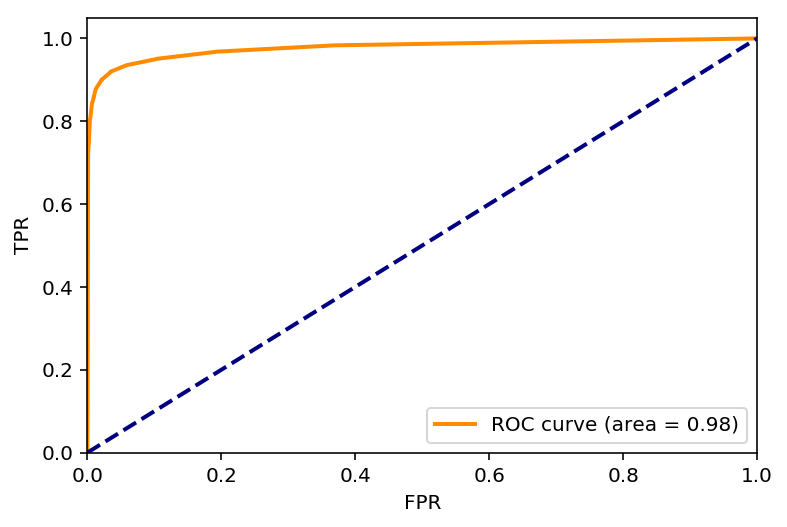

In [56]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
# plt.xlim([1e-5, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc="lower right")
# plt.xscale('log')
plt.savefig('hey.png')
plt.show()

In [63]:
# true = np.array([1,0,1,0,0,0])
# prob = np.array([0.98,0.89,0.63,0.49,0.33,0.1])
# f,t,tr = roc_curve(true,prob)

# plt.plot(f, t, color='darkorange', lw=lw)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([-0.05, 1.0])
# # plt.xlim([1e-5, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.show()

In [57]:
(pr_proba[y_test==0] == 1).mean()

0.0014001516830990024

C:\Users\pogorelov_g\Desktop\work\venv_py36\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


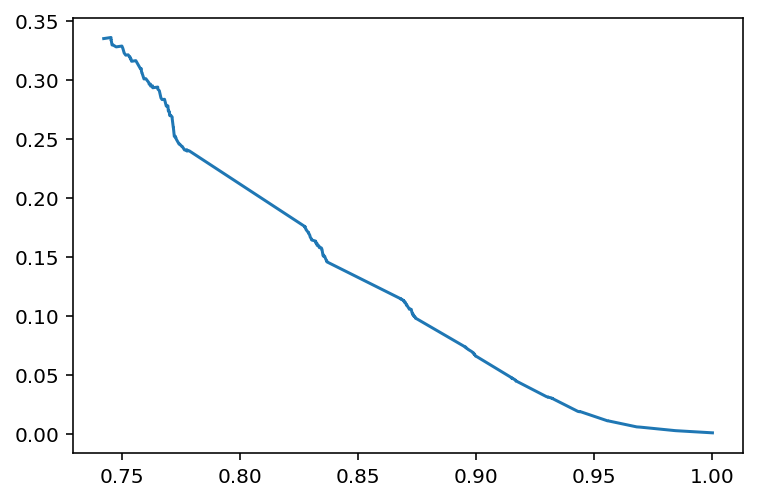

In [53]:
recall = tpr / (tpr + 1000 * fpr)
plt.plot(tpr, recall)
plt.show()

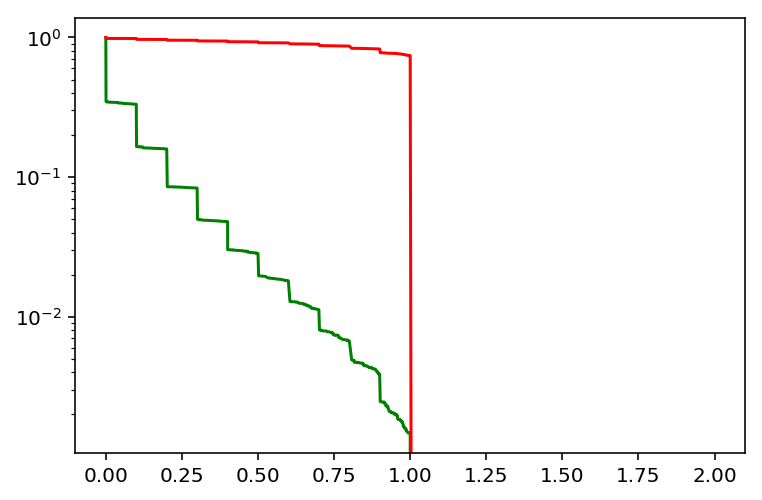

In [54]:
plt.plot(thr, fpr, 'g-')
plt.plot(thr, tpr, 'r-')
plt.yscale('log')
plt.show()

#### autoencoder

In [ ]:
x_autoenc = encoder.predict(X)
x_train, x_test, y_train, y_test = train_test_split(x_autoenc, Y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
p = clf.predict(x_test)
print((p == y_test).mean())

In [ ]:
pr_proba = clf.predict_proba(x_test)
pr_proba = np.reshape(pr_proba[:,1],newshape=(len(pr_proba),1))
probas.append(pr_proba)

In [24]:
fpr(y_test, p)

0.020827256286097662

#### subgraphs

In [ ]:
import tensorflow as tf

In [8]:
path_to_model = 'model/'
sess=tf.Session()
saver = tf.train.import_meta_graph(path_to_model+'model.meta')
saver.restore(sess, tf.train.latest_checkpoint(path_to_model))
sg_weights = sess.run('subgraph_embeddings:0')

x_sg = np.matmul(X,sg_weights)

INFO:tensorflow:Restoring parameters from model/model


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x_sg, Y, test_size=0.2, random_state=42)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
p = clf.predict(x_test)
print((p == y_test).mean())

0.9555380114243255


In [16]:
pr_proba = clf.predict_proba(x_test)
pr_proba = np.reshape(pr_proba[:,1],newshape=(len(pr_proba),1))
probas.append(pr_proba)

In [10]:
print(classification_report(y_test, p))

             precision    recall  f1-score   support

          0       0.95      0.98      0.97     68564
          1       0.97      0.91      0.94     39101

avg / total       0.96      0.96      0.96    107665



In [11]:
fpr(y_test, p)

0.018668689107986698

## ROC curves

In [38]:
pr_dict = {}
pr_dict[0] = 'sub2vec'
pr_dict[1] = 'pca'
pr_dict[2] = 'autoencoder'

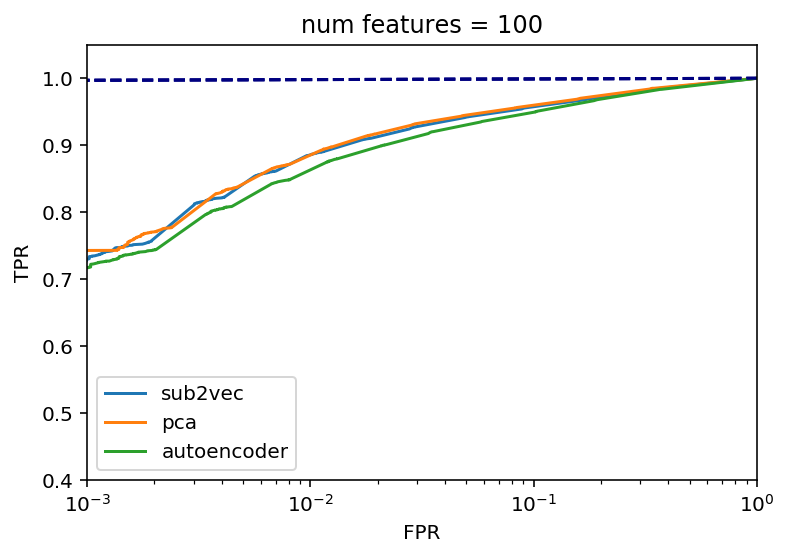

<Figure size 432x288 with 0 Axes>

In [64]:
plt.figure()
for i,pr in enumerate(probas):
    fpr, tpr, thr = roc_curve(y_test, pr)

    plt.plot(fpr, tpr, label=pr_dict[i])
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([1e-3, 1.0])
    plt.ylim([0.4, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.xscale('log')
plt.legend()
plt.title('num features = 100')
plt.show()
plt.savefig('feat_100.png')
# ('foo.png', bbox_inches='tight')

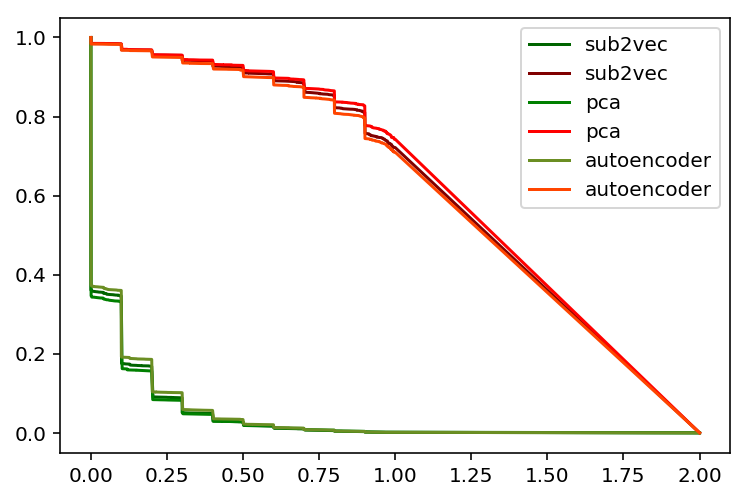

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure()
first_c = ['maroon','red','orangered']
sec_c = ['darkgreen','g','olivedrab']
for i,pr in enumerate(probas):
    fpr, tpr, thr = roc_curve(y_test, pr)
    plt.plot(thr, fpr, sec_c[i],label=pr_dict[i])
    plt.plot(thr, tpr, first_c[i],label=pr_dict[i])
plt.legend()
# plt.title('num features = 100')
plt.show()
plt.savefig('thresholds_100.png')
# ('foo.png', bbox_inches='tight')

In [ ]:
plt.plot(thr, fpr, 'g-')
plt.plot(thr, tpr, 'r-')
plt.yscale('log')
plt.show()

## xgboost

In [30]:
import xgboost as xgb
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [42]:
x, x_test, y, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

acc_scorer = make_scorer(accuracy_score)

clf = xgb.XGBClassifier()
parameters = {
    'max_depth': [2,3,4],
    'n_estimators': [300, 400],
    'learning_rate': [0.05, 0.1],
    'reg_lambda': [1,3] }

grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(x, y)

In [29]:
clf = xgb.XGBClassifier()
clf.fit(x, y)

In [13]:
predictions = clf.predict(x_test)
print(accuracy_score(y_test, predictions))

0.5977363107984093


/Users/grigoriipogorelov/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
